# Import the required libraries

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree
import seaborn as sns 

# Read the data file,Check Variable types and missiong values from dataset

In [2]:
flightsdf = pd.read_csv('FlightDelaysTrainingData.csv')
flightsdf.isna().sum()
flightsdf.head()

,CRS_DEP_TIME,DISTANCE,Weather,DAY_WEEK,Flight Status
0,1455,184,0,4,ontime
1,1640,213,0,4,ontime
2,1245,229,0,4,ontime
3,1715,229,0,4,ontime
4,1039,229,0,4,ontime


# Treat Flight Status as categorical, convert to dummy variables

In [3]:
#df=pd.get_dummies(flightsdf, columns=['Flight Status'], drop_first=True)
#df

#  Data Variables Information as per data types

In [4]:
flightsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   DISTANCE       2201 non-null   int64 
 2   Weather        2201 non-null   int64 
 3   DAY_WEEK       2201 non-null   int64 
 4   Flight Status  2201 non-null   object
dtypes: int64(4), object(1)
memory usage: 86.1+ KB


# Set the repdectors and the outcome variables

In [5]:
X =flightsdf.drop(columns=['Flight Status'])
y =flightsdf['Flight Status']


# Split the data into training (60%) and testing (40%)

In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Build the Decision tree Model

In [7]:
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

DecisionTreeClassifier()

# Plot the tree

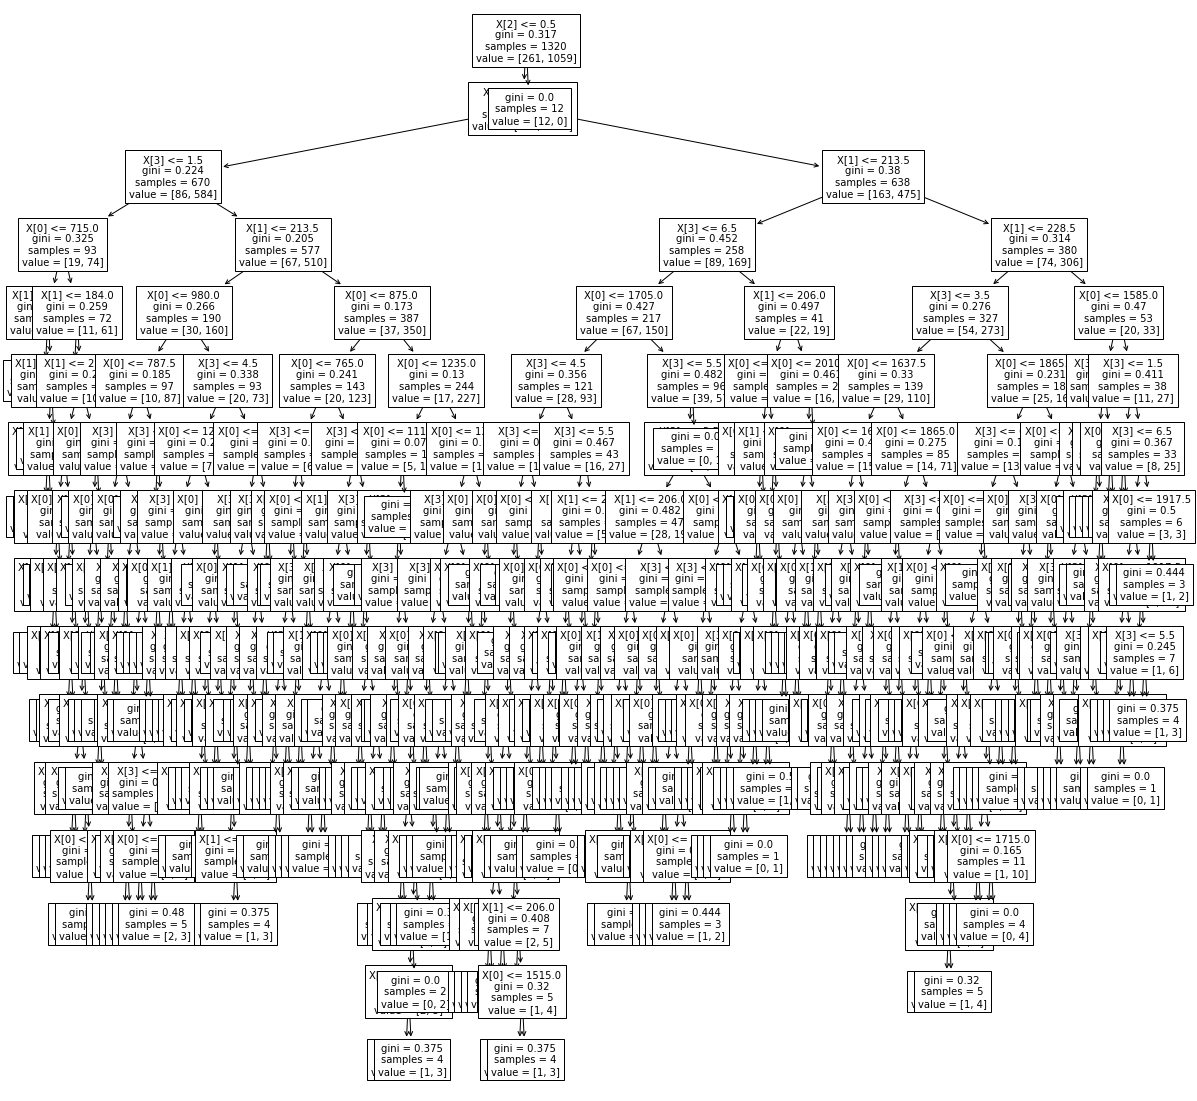

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(fullClassTree, fontsize=10)
plt.show()

# Performance evaluation

In [26]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8227)

       Prediction
Actual    0    1
     0   84  177
     1   57 1002
Confusion Matrix (Accuracy 0.7480)

       Prediction
Actual   0   1
     0  26 141
     1  81 633


# Using testing data set for predicting  results

In [27]:
flights_df = pd.read_csv('FlightDelaysTestingData.csv')
flights_df


,CRS_DEP_TIME,DAY_WEEK
0,10,3
1,13,3
2,7,4
3,16,5
4,6,3


# Try to test the Decision Tree model using new testing data!!

In [28]:

flight_dt=fullClassTree.predict(flights_df)
result = pd.DataFrame({'flight Status': flight_dt})
print(result)


  flight Status
0        ontime
1        ontime
2        ontime
3        ontime
4        ontime
